In [2]:
import pandas as pd

In [3]:

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\archive (2)\college_student_placement_dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [7]:
df.columns


Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [8]:
df.describe()


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


Text(0.5, 1.0, 'Proportion of Student Placed')

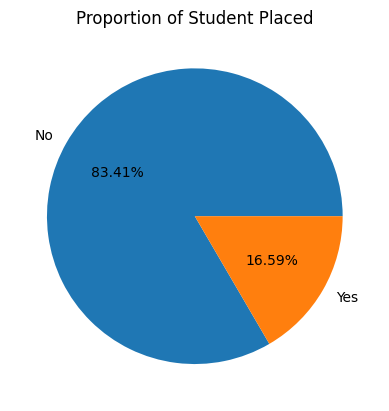

In [9]:
ax=df.groupby(["Placement"],as_index=True).agg({"Placement":"count"})
plt.pie(ax["Placement"],labels=ax.index,autopct="%1.2f%%")
plt.title("Proportion of Student Placed")

Conclusion:Placement rate is quite low, only 16.59% of students were placed and  large majority  of students 83.41% were not placed.

Text(0.5, 1.0, 'Proportion of Students with Internship Experience')

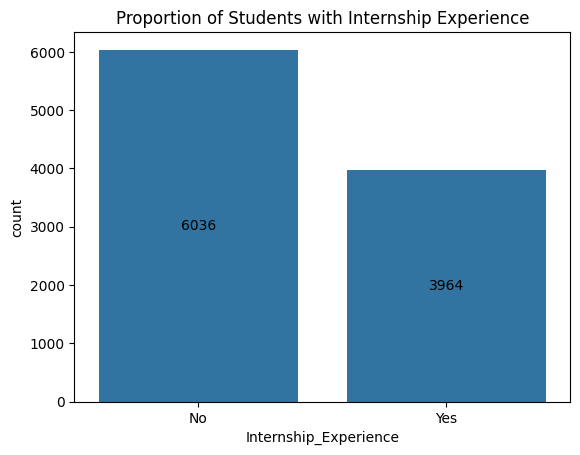

In [10]:
ax1=sns.countplot(x="Internship_Experience",data=df)
for bar in ax1.containers:
    ax1.bar_label(bar,label_type="center")
plt.title("Proportion of Students with Internship Experience")

Conclusion: Among all studenyts only 39.64% have internship experience

Impact of prior Internship_experience on placement using stacked column chart

Internship_Experience    No   Yes
Placement                        
No                     5024  3317
Yes                    1012   647


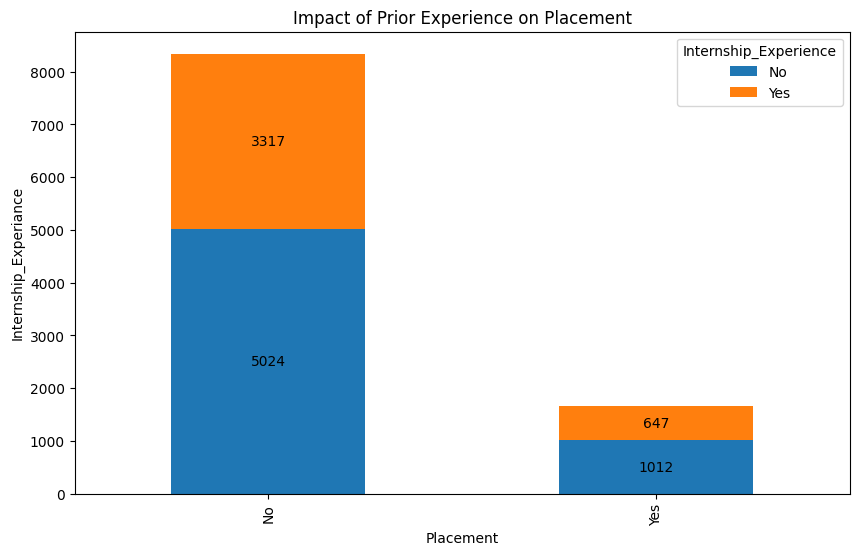

In [11]:
ax2=df.groupby(["Placement","Internship_Experience"]).size().unstack(fill_value=0)
print(ax2)
ay=ax2.plot(kind="bar",stacked=True,figsize=(10,6))
plt.title("Impact of Prior Experience on Placement")  
plt.xlabel("Placement")  
plt.ylabel("Internship_Experiance")
for values in ay.containers:
    ay.bar_label(values,label_type="center")

Impact of prior Internship_experience on placement using column chart

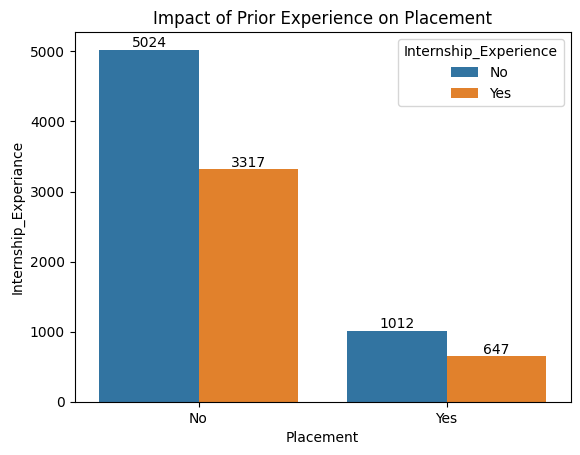

In [12]:
ax3=sns.countplot(x="Placement",hue="Internship_Experience",data=df)
plt.title("Impact of Prior Experience on Placement")  
plt.xlabel("Placement")  
plt.ylabel("Internship_Experiance")
for bar in ax3.containers:
    ax3.bar_label(bar,label_type='edge')


Conclusion:
From above graph we conclude that  students without internships had a slightly higher placement rate (16.76%) than those with internships (16.32%), based on this data.
This suggests that while internships are important, they are not the sole factor influencing placement. Other factors like academic performance,project, your percentage,extra curricullar score, communication skills, or the nature of the internship could also play a major role.

Placement   No  Yes
College_ID         
CLG0001     98   11
CLG0002     74   12
CLG0003     80   17
CLG0004     78   13
CLG0005     95   17


Text(0, 0.5, 'Number of Students Placed')

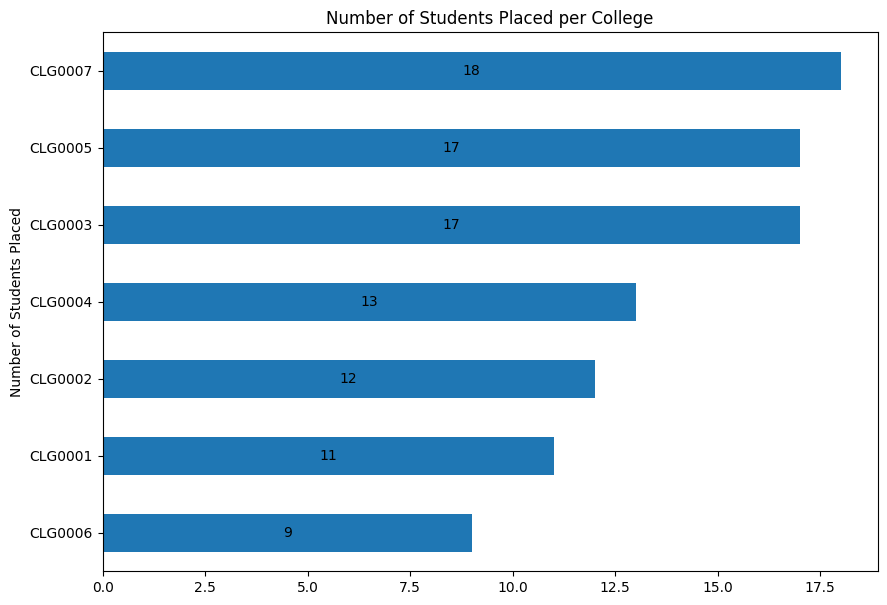

In [13]:
ax4=df.groupby(["College_ID","Placement"],as_index=True).size().unstack(fill_value=0).head(7)
print(ax4.head(5))
ax4_sorted=ax4.sort_values(by="Yes",ascending=True)
ay=ax4_sorted["Yes"].plot(kind="barh",stacked=True,figsize=(10,7))
for bar in ay.containers:
    ay.bar_label(bar,label_type="center")
plt.title("Number of Students Placed per College")
plt.ylabel("Number of Students Placed")

Conclusion: Here college with ID 7 achieved 18 students placements.

To properly evaluate college ID 7,s placement performans,simply stating 18 placements is insufficient.The total number of student is
a vital factor,thats why we draw a chart according to its percentage.

Placement   No  Yes
College_ID         
CLG0001     98   11
CLG0002     74   12
CLG0003     80   17
CLG0004     78   13
CLG0005     95   17
College_ID
CLG0001    10.09
CLG0002    13.95
CLG0003    17.53
CLG0004    14.29
CLG0005    15.18
CLG0006    10.84
CLG0007    19.15
Name: Placement_Percentage1, dtype: float64


Text(0, 0.5, 'Number of Students Placed')

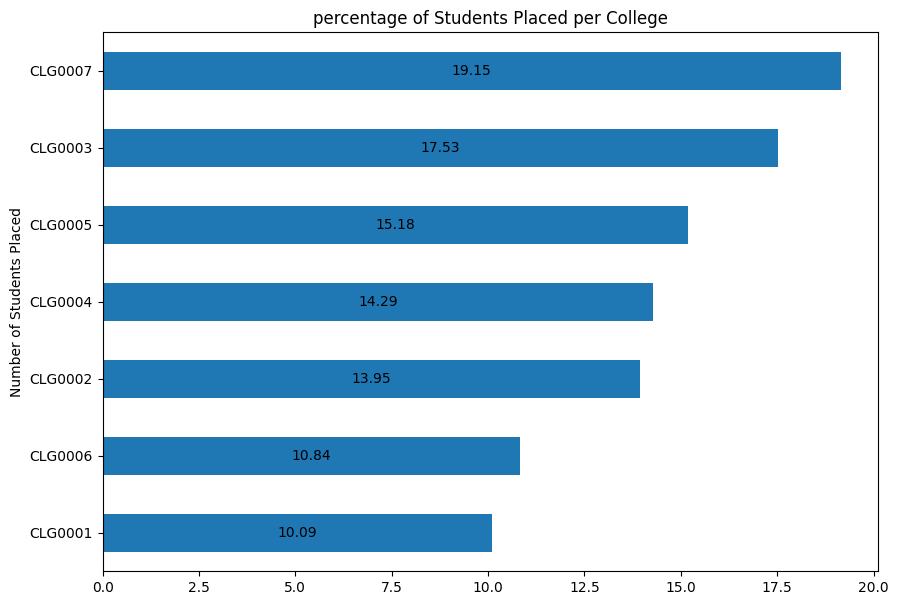

In [ ]:
ax4=df.groupby(["College_ID","Placement"],as_index=True).size().unstack(fill_value=0).head(7)
# print(ax4.head(5))
ax4["Placement_Percentage"]=(ax4["Yes"]/(ax4["Yes"]+ax4["No"]))*100 
ax4["Placement_Percentage1"]=ax4["Placement_Percentage"].round(2)
# print(ax4["Placement_Percentage1"].head(10))
ax4_sorted=ax4.sort_values(by="Placement_Percentage1",ascending=True)
ay=ax4_sorted["Placement_Percentage1"].plot(kind="barh",stacked=True,figsize=(10,7))
for bar in ay.containers:
    ay.bar_label(bar,label_type="center")
plt.title("percentage of Students Placed per College")
plt.ylabel("Number of Students Placed")

Conclusion: By considering total students per college CLG0007 holds 1st position in both total placements and placement percentage, making it the strongest overall performer.CLG0003 jumps to 2nd in percentage, even though it's tied at 2nd in count showing it's more efficient in placing students
   Although some colleges perform slightly better in terms of placement rate, overall placement success is low across all institutions

                              IQ  Prev_Sem_Result      CGPA  \
IQ                      1.000000        -0.002640 -0.002859   
Prev_Sem_Result        -0.002640         1.000000  0.980768   
CGPA                   -0.002859         0.980768  1.000000   
Academic_Performance   -0.006827        -0.005765 -0.002958   
Extra_Curricular_Score -0.003458         0.009326  0.011441   
Communication_Skills   -0.010896        -0.017269 -0.018242   
Projects_Completed      0.014538         0.018434  0.020872   

                        Academic_Performance  Extra_Curricular_Score  \
IQ                                 -0.006827               -0.003458   
Prev_Sem_Result                    -0.005765                0.009326   
CGPA                               -0.002958                0.011441   
Academic_Performance                1.000000                0.011774   
Extra_Curricular_Score              0.011774                1.000000   
Communication_Skills               -0.019733                0.0

<Axes: >

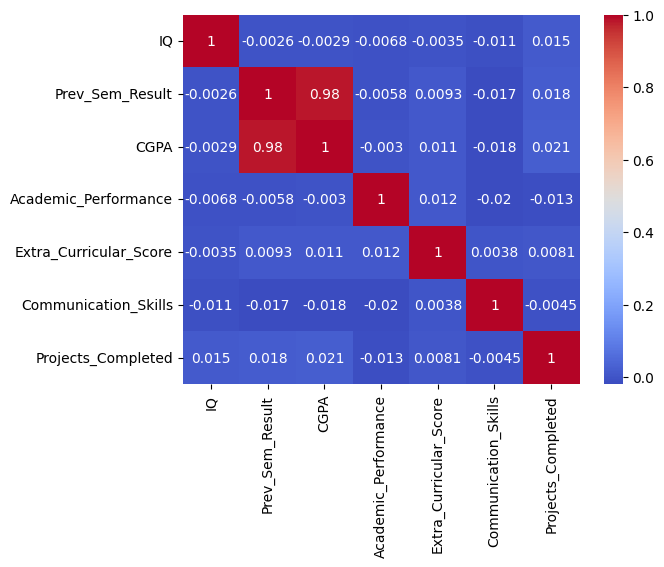

In [20]:
df["Internship_Experience"]=df["Internship_Experience"].map({'Yes':0,'No':1})
correl=df.drop(["College_ID","Internship_Experience","Placement"],axis=1).corr()
print(correl)
sns.heatmap(correl,annot=True,cmap="coolwarm")

Conclusion :
1.Prev_Sem_Result and CGPA have a very strong correlation (~0.98), which is expected students who perform well in previous semesters tend to have a higher CGPA.
2.IQ, Communication_Skills, Projects_Completed, Academic_Performance, etc. all show weak or near-zero correlation with each other.
This implies that most of these attributes are independent of one another in this dataset.
3.The matrix doesn’t show any strong negative correlation (i.e., close to -1), so there is no clear inverse relationship between any pair of features.
